In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("../src/estaticos_market.csv")
df = df.drop(['Unnamed: 0'], axis=1)


In [31]:
df.head(1)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0


In [11]:
df.describe()

,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.000000,280.000000,176.000000,30684.000000,30684.000000,6590.000000,460371.000000,460371.000000,1760.000000,336.000000,...,76261.000000,76261.000000,76261.000000,103574.000000,103574.000000,103574.000000,73888.000000,74014.000000,103574.000000,462298.000000
mean,9.948677,32.014286,3.818182,2.244329,1.177813,5.769044,3.591801,48.699177,134.597159,15.934524,...,58.060498,96.661983,36.258851,12.324570,12.178529,14.343329,3.097607,-5.834288,9.510699,28.737044
std,9.615664,81.280168,6.797555,9.572536,6.589059,25.450950,72.600352,1206.696804,683.774506,29.708663,...,142.951278,279.541243,123.411370,222.456579,222.584458,239.885359,163.581549,443.825819,27.918737,468.626094
min,0.016438,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.933333,1.933333,1.933333,0.000000,0.000000,0.000000,-100.000000,-100.000000,0.000000,0.000000
25%,2.756164,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,...,25.203704,33.333333,6.966667,0.000000,0.000000,0.000000,0.000000,-44.444444,0.000000,0.000000
50%,6.704110,15.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,15.000000,3.000000,...,43.533333,61.766667,23.200000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,14.465753,30.000000,4.000000,2.000000,1.000000,4.000000,0.000000,0.000000,66.250000,8.000000,...,68.883333,96.266667,46.500000,5.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000
max,106.432877,1215.000000,50.000000,489.000000,363.000000,1017.000000,9782.000000,122090.000000,11922.000000,108.000000,...,5099.066667,5099.066667,5099.066667,51547.000000,51547.000000,54205.000000,27800.000000,87300.000000,1400.000000,9647.000000


In [41]:
a = df.isna().sum().to_frame("faltantes").join(
df.isnull().sum().to_frame('%')*100/len(df)).round(2)

In [42]:
a = a.sort_values(by=['faltantes'],ascending = False)
print(a.to_string())

                                               faltantes       %
qt_alteracao_socio_total                          462298  100.00
qt_alteracao_socio_90d                            462298  100.00
grau_instrucao_macro_desconhecido                 462298  100.00
qt_alteracao_socio_180d                           462298  100.00
qt_alteracao_socio_365d                           462298  100.00
coligada_mais_antiga_baixada                      462162   99.97
coligada_mais_nova_baixada                        462162   99.97
idade_media_coligadas_baixadas                    462162   99.97
vl_total_veiculos_antt                            462122   99.96
vl_total_tancagem                                 462018   99.94
vl_total_veiculos_antt_grupo                      461962   99.93
vl_total_tancagem_grupo                           460538   99.62
grau_instrucao_macro_analfabeto                   460414   99.59
idade_ate_18                                      459392   99.37
qt_socios_st_suspensa    

In [43]:
df[['nm_micro_regiao','nm_meso_regiao']].describe()

,nm_micro_regiao,nm_meso_regiao
count,403600,403600
unique,73,19
top,MANAUS,CENTRO AMAZONENSE
freq,60008,71469


In [16]:
a[a['%']<12.7]

,faltantes,%
nu_meses_rescencia,45276,9.79
vl_faturamento_estimado_grupo_aux,27513,5.95
vl_faturamento_estimado_aux,27513,5.95
de_faixa_faturamento_estimado_grupo,27513,5.95
de_faixa_faturamento_estimado,27513,5.95
de_saude_rescencia,14851,3.21
de_saude_tributaria,14851,3.21
de_nivel_atividade,11168,2.42
sg_uf_matriz,1939,0.42
fl_passivel_iss,1927,0.42


In [44]:
dfb = a[a['%']<12.7].index.values.astype(str)

In [45]:
dfb = np.append (dfb, ['id'])
dfb

array(['nu_meses_rescencia', 'vl_faturamento_estimado_grupo_aux',
       'vl_faturamento_estimado_aux',
       'de_faixa_faturamento_estimado_grupo',
       'de_faixa_faturamento_estimado', 'de_saude_rescencia',
       'de_saude_tributaria', 'de_nivel_atividade', 'sg_uf_matriz',
       'fl_passivel_iss', 'setor', 'nm_divisao', 'fl_simples_irregular',
       'nm_segmento', 'vl_total_veiculos_pesados_grupo', 'fl_veiculo',
       'fl_antt', 'fl_spa', 'vl_total_veiculos_leves_grupo',
       'dt_situacao', 'id', 'fl_matriz', 'fl_me', 'de_natureza_juridica',
       'sg_uf', 'natureza_juridica_macro', 'de_ramo',
       'idade_empresa_anos', 'idade_emp_cat', 'fl_sa', 'fl_rm', 'fl_epp',
       'fl_mei', 'fl_ltda', 'fl_st_especial', 'fl_email', 'fl_telefone',
       'qt_filiais', 'id'], dtype='<U35')

In [46]:
dfAlterado = df[dfb]

In [47]:
dfAlterado.head()

,nu_meses_rescencia,vl_faturamento_estimado_grupo_aux,vl_faturamento_estimado_aux,de_faixa_faturamento_estimado_grupo,de_faixa_faturamento_estimado,de_saude_rescencia,de_saude_tributaria,de_nivel_atividade,sg_uf_matriz,fl_passivel_iss,...,fl_sa,fl_rm,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,qt_filiais,id
0,23.0,3132172.8,3132172.8,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",ACIMA DE 1 ANO,VERDE,ALTA,RN,True,...,False,SIM,False,False,False,False,True,True,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,9.0,210000.0,210000.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",ATE 1 ANO,CINZA,BAIXA,PI,True,...,False,SIM,False,True,False,False,True,True,0,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,26.0,50000.0,50000.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",ACIMA DE 1 ANO,AMARELO,MEDIA,AM,True,...,False,SIM,False,True,False,False,False,True,0,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,26.0,210000.0,210000.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",ACIMA DE 1 ANO,AMARELO,MEDIA,AM,True,...,False,SIM,False,False,False,False,True,True,0,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,27.0,210000.0,210000.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",ACIMA DE 1 ANO,VERDE,ALTA,RN,True,...,False,SIM,False,False,False,False,True,True,0,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [105]:
dfAlterado.dtypes

nu_meses_rescencia                     float64
vl_faturamento_estimado_grupo_aux      float64
vl_faturamento_estimado_aux            float64
de_faixa_faturamento_estimado_grupo     object
de_faixa_faturamento_estimado           object
de_saude_rescencia                      object
de_saude_tributaria                     object
de_nivel_atividade                      object
sg_uf_matriz                            object
fl_passivel_iss                         object
setor                                   object
nm_divisao                              object
fl_simples_irregular                    object
nm_segmento                             object
vl_total_veiculos_pesados_grupo        float64
fl_veiculo                              object
fl_antt                                 object
fl_spa                                  object
vl_total_veiculos_leves_grupo          float64
dt_situacao                             object
id                                      object
fl_matriz    

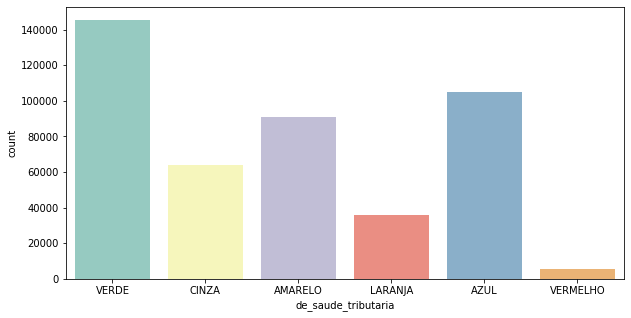

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(x="de_saude_tributaria", data=dfAlterado, palette="Set3")

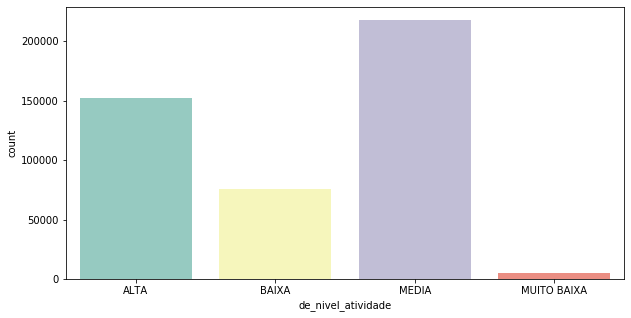

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x="de_nivel_atividade", data=dfAlterado, palette="Set3")

In [1]:
plt.figure(figsize=(10,5))
sns.countplot(x="de_saude_rescencia", data=dfAlterado, palette="Set3", log = True)

NameError: name 'plt' is not defined

Histograma vl_faturamento_estimado_aux                        Histograma nu_meses_rescencia 


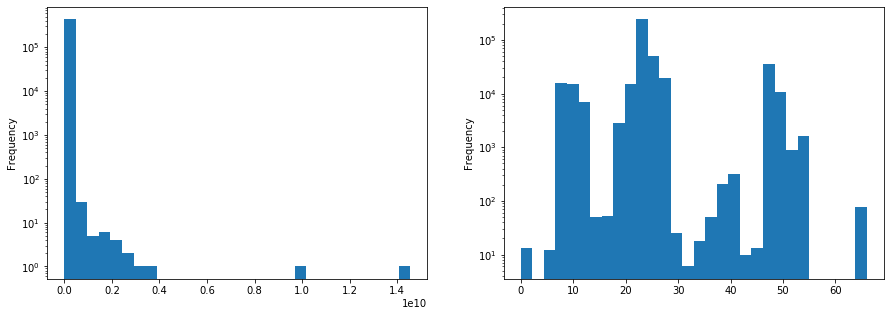

In [101]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
dfAlterado['vl_faturamento_estimado_aux'].plot.hist(bins = 30,log = True)

plt.subplot(1, 2, 2)
dfAlterado['nu_meses_rescencia'].plot.hist(bins = 30,log = True)
print("Histograma vl_faturamento_estimado_aux                        Histograma nu_meses_rescencia ")
plt.show()